# Anamoly Detection Using VAE

<img src = 'VAE.jpeg' width="500" height="10">
<img src="VAE_Arch.png" width="800" height="150">

In [2]:
# Importing the required libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [4]:
# Generate a synthetic dataset with anomalies
np.random.seed(0)
normal_data = np.random.normal(loc = 0, scale = 1, size = (5000, 10))
anomalies = np.random.uniform(low = -5, high = 5, size = (100, 10))
data = np.vstack((normal_data, anomalies))
# Create labels (0 for normal, 1 for anomalies)
labels = np.zeros(len(data))
labels[len(normal_data):] = 1
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 0)

In [9]:
# Define an Autoencoder model for anomaly detection
input_dim = X_train.shape[1]
model = keras.Sequential([
keras.layers.Input(shape=(input_dim,)),
keras.layers.Dense(128, activation = 'relu'),
keras.layers.Dense(128, activation = 'relu'),
keras.layers.Dense(128, activation = 'relu'),
keras.layers.Dense(128, activation = 'relu'),
keras.layers.Dense(128, activation = 'relu'),
keras.layers.Dense(128, activation = 'relu'),
keras.layers.Dense(input_dim, activation = 'sigmoid')])
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Train the Autoencoder: Training X_train on itself in the code is a common practice in autoencoder-based anomaly detection.
# This approach is known as unsupervised learning.
model.fit(X_train, X_train, epochs = 50, batch_size = 16, validation_data = (X_test, X_test))
model.summary()

Epoch 1/50
255/255 [==============================] - 0s 900us/step - loss: 0.9452 - val_loss: 0.7998
Epoch 2/50
255/255 [==============================] - 0s 733us/step - loss: 0.7883 - val_loss: 0.7880
Epoch 3/50
255/255 [==============================] - 0s 725us/step - loss: 0.7833 - val_loss: 0.7858
Epoch 4/50
255/255 [==============================] - 0s 732us/step - loss: 0.7816 - val_loss: 0.7850
Epoch 5/50
255/255 [==============================] - 0s 727us/step - loss: 0.7816 - val_loss: 0.7848
Epoch 6/50
255/255 [==============================] - 0s 732us/step - loss: 0.7815 - val_loss: 0.7853
Epoch 7/50
255/255 [==============================] - 0s 733us/step - loss: 0.7818 - val_loss: 0.7843
Epoch 8/50
255/255 [==============================] - 0s 729us/step - loss: 0.7818 - val_loss: 0.7853
Epoch 9/50
255/255 [==============================] - 0s 717us/step - loss: 0.7822 - val_loss: 0.7834
Epoch 10/50
255/255 [==============================] - 0s 733us/step - loss: 0.781

In [45]:
from keras.utils.vis_utils import model_to_dot 
from IPython.display import SVG
SVG(model_to_dot(model.model_, show_shapes=True, show_layer_names=True, rankdir='TB').create(prog='dot', format='svg'))

ModuleNotFoundError: No module named 'keras.utils.vis_utils'

In [10]:
# Calculate reconstruction errors on the test set
reconstructed_data = model.predict(X_test)
reconstruction_errors = np.mean(np.square(X_test - reconstructed_data), axis = 1)
# Define a threshold for anomaly detection using a 99th percentile
threshold = np.percentile(reconstruction_errors, 99)
# Classify data points as normal or anomalies based on the threshold
predicted_labels = (reconstruction_errors > threshold).astype(int)

32/32 [==============================] - 0s 463us/step


In [43]:
# model.model_
# pd.DataFrame.from_dict(model.history).plot(title='Error Loss History');

In [12]:
# Evaluate the anomaly detection performance
accuracy = np.mean(predicted_labels == y_test)
precision = np.sum((predicted_labels == 1) & (y_test == 1)) / np.sum(predicted_labels == 1)
recall = np.sum((predicted_labels == 1) & (y_test == 1)) / np.sum(y_test == 1)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9901960784313726
Precision: 1.0
Recall: 0.5238095238095238


In [14]:
%whos

Variable                Type               Data/Info
----------------------------------------------------
X_test                  ndarray            1020x10: 10200 elems, type `float64`, 81600 bytes
X_train                 ndarray            4080x10: 40800 elems, type `float64`, 326400 bytes (318.75 kb)
accuracy                float64            0.9901960784313726
anomalies               ndarray            100x10: 1000 elems, type `float64`, 8000 bytes
data                    ndarray            5100x10: 51000 elems, type `float64`, 408000 bytes (398.4375 kb)
input_dim               int                10
keras                   KerasLazyLoader    <KerasLazyLoader (keras_2<...>keras as keras mode=None>
labels                  ndarray            5100: 5100 elems, type `float64`, 40800 bytes
model                   Sequential         <keras.src.engine.sequent<...>al object at 0x28cd7d390>
normal_data             ndarray            5000x10: 50000 elems, type `float64`, 400000 bytes (390.625

In [20]:
(predicted_labels-y_test).sum()

-10.0

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: xlabel='0'>

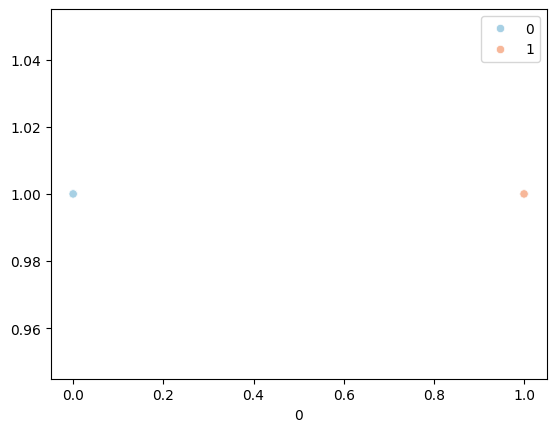

In [34]:
sns.scatterplot(x=0, y=1, data=pd.DataFrame(y_test), hue=predicted_labels,palette='RdBu_r')

<Axes: xlabel='0', ylabel='1'>

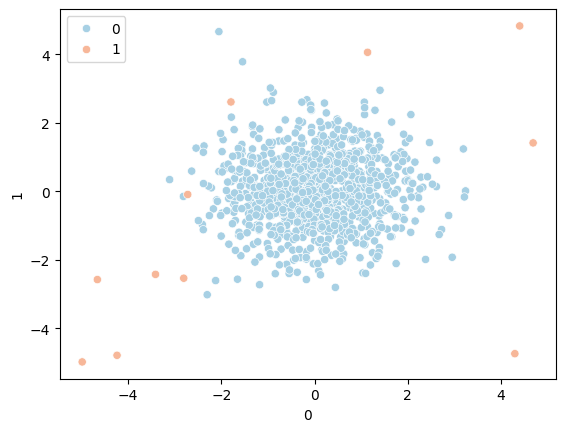

In [30]:
sns.scatterplot(x=0, y=1, data=pd.DataFrame(X_test),hue=predicted_labels,palette='RdBu_r')

In [46]:
# https://learning.oreilly.com/library/view/use-anomaly-detection/9781098167332/ch01.html
# https://arxiv.org/pdf/1606.05908.pdf
# https://keras.io/examples/timeseries/timeseries_anomaly_detection/